In [77]:
#!pip install osmnx
import osmnx as ox
import networkx as nx
import matplotlib as plt
import pandas as pd
import numpy as np

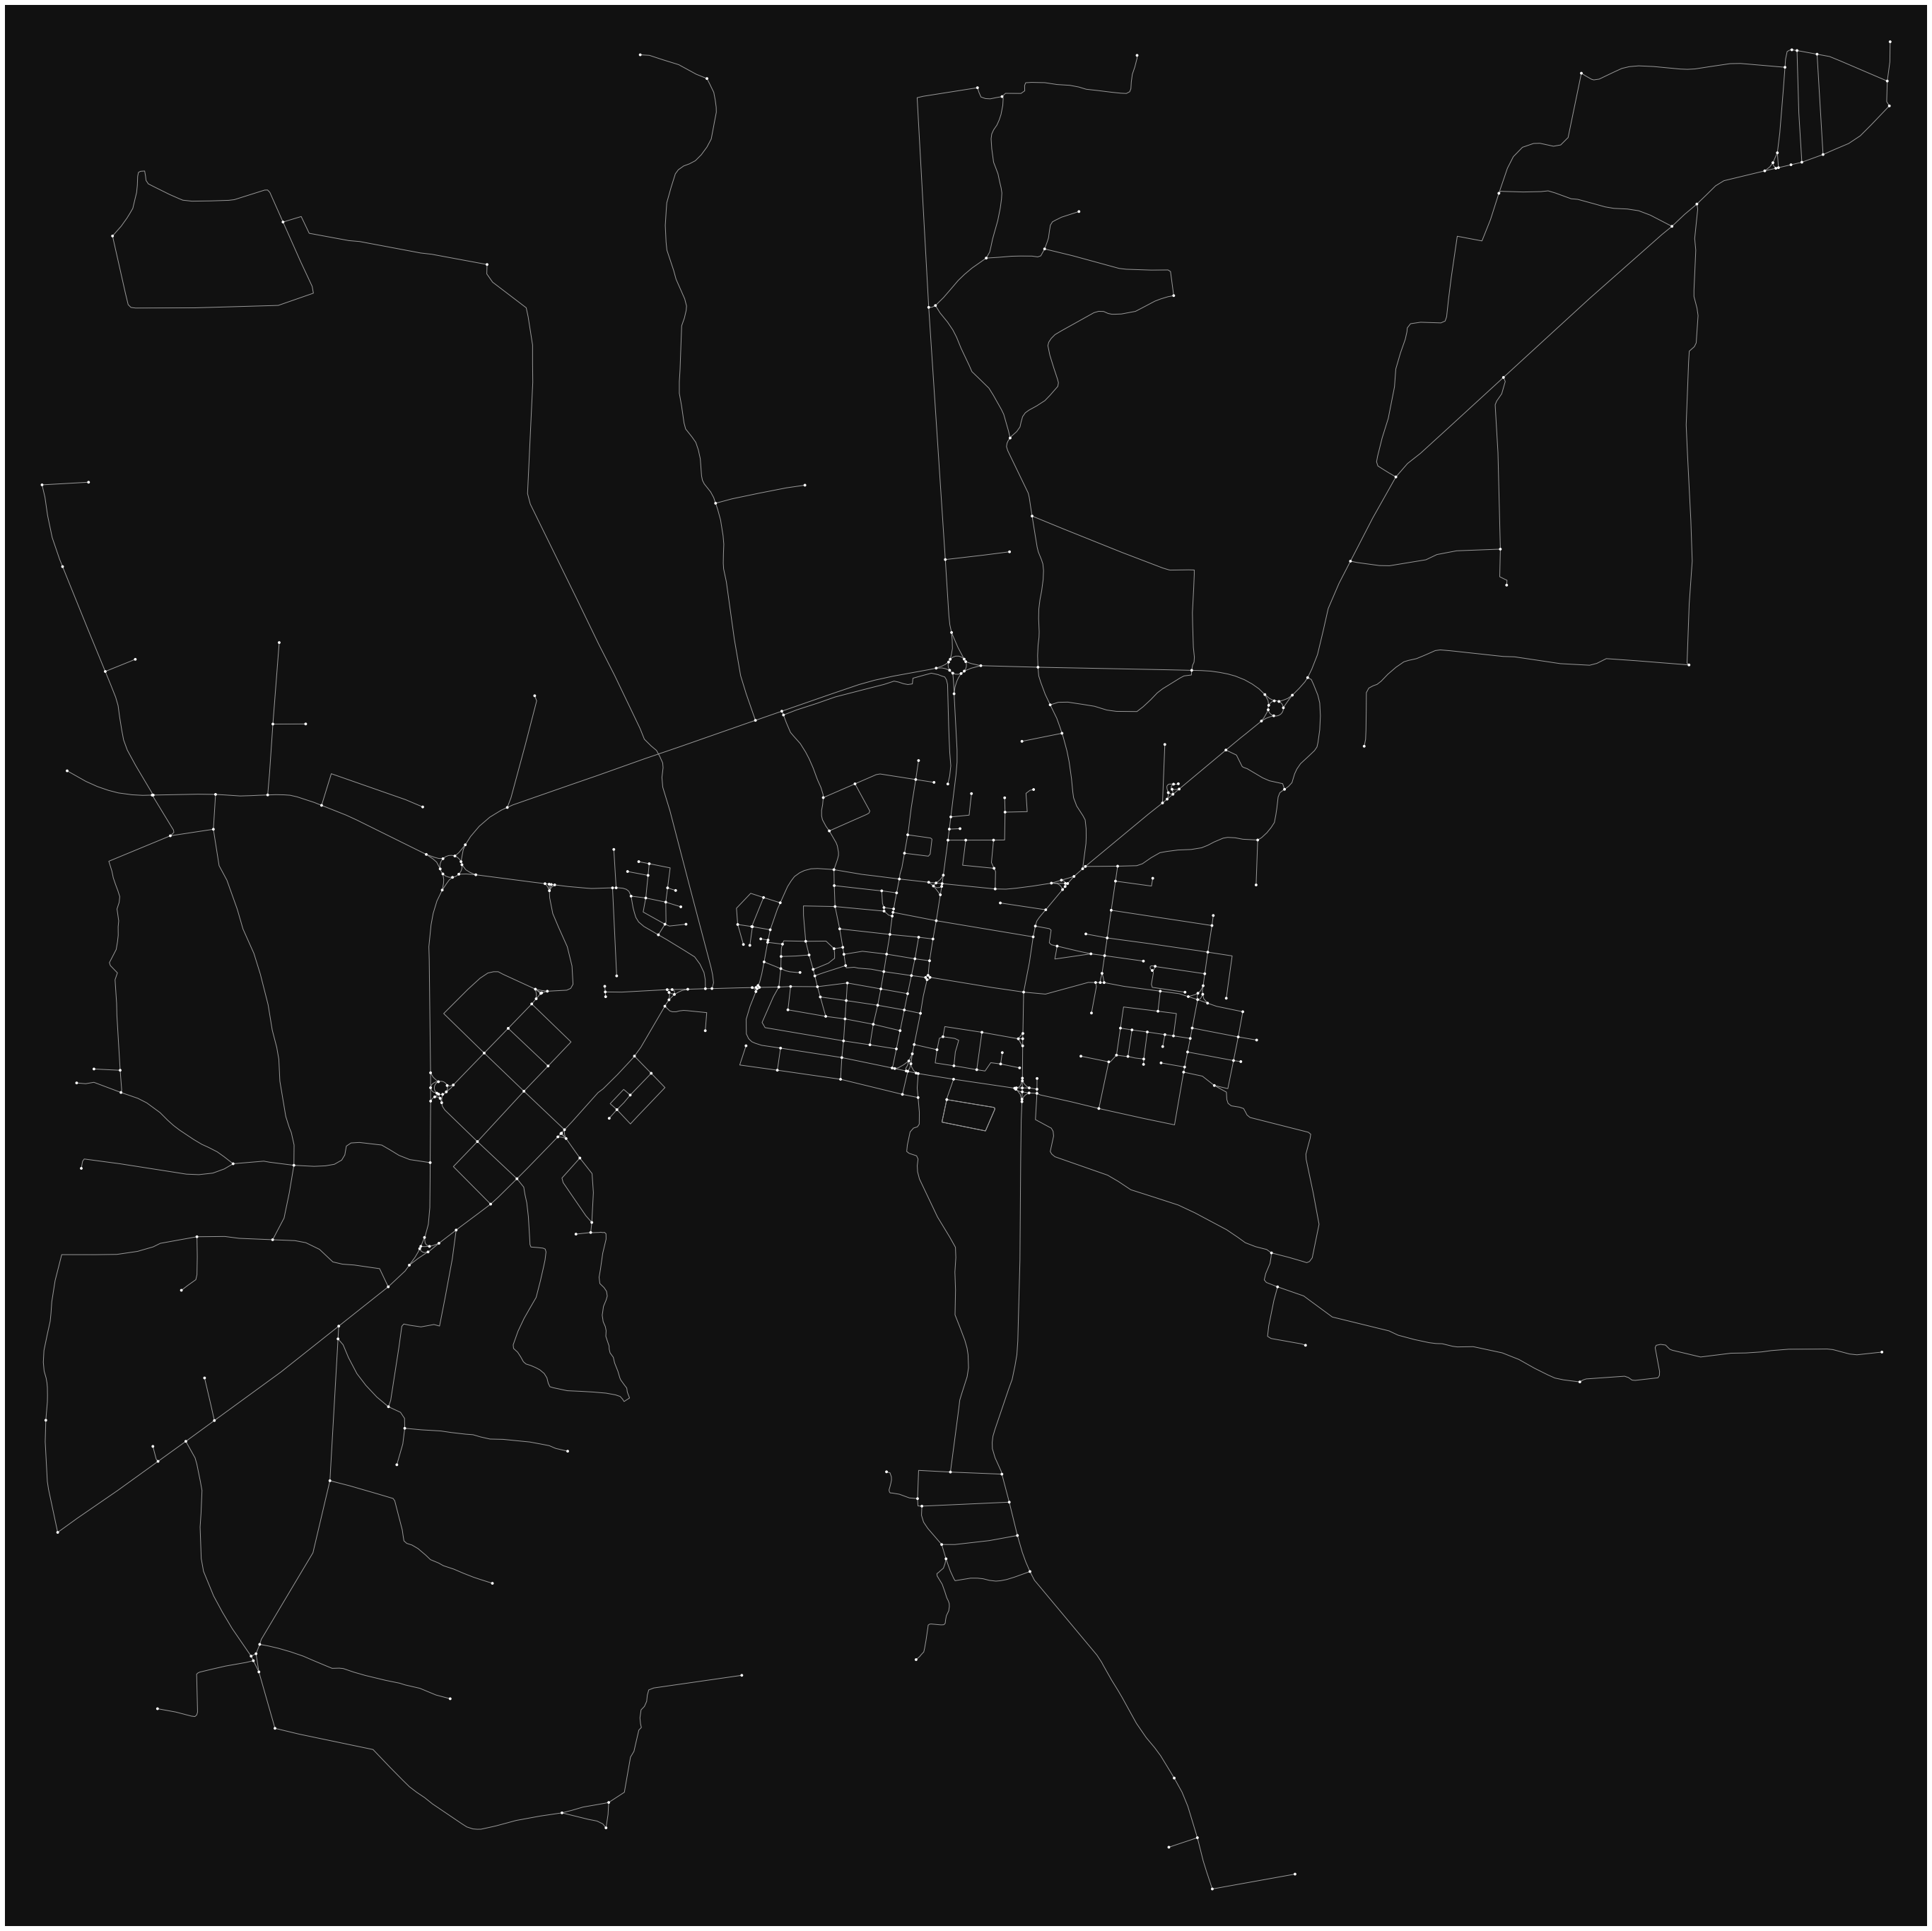

In [2]:

# download/model a street network for some city then visualize it
filename = 'data/Asola_graph.xml'
G = ox.load_graphml(filepath=filename)
#G = ox.graph_from_point([ 45.2566937,10.4788054 ],dist=1000, network_type="drive")
fig, ax = ox.plot_graph(G, figsize=(50,50))

#ox.plot_shape(ox.project_gdf(G))


In [3]:
# Defining the map boundaries 
#north, east, south, west = 45.256, 10.477 , 45.257, 10.478  
# Downloading the map as a graph object 
#G = ox.graph_from_bbox(north, south, east, west, network_type = 'drive')  
# Plotting the map graph 
#ox.plot_graph(G)

In [4]:


# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m



31968154.465130813

In [5]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

{'n': 480,
 'm': 664,
 'k_avg': 2.7666666666666666,
 'edge_length_total': 105229.462,
 'edge_length_avg': 158.47810542168673,
 'streets_per_node_avg': 2.8270833333333334,
 'streets_per_node_counts': {0: 0, 1: 75, 2: 1, 3: 340, 4: 60, 5: 4},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.15625,
  2: 0.0020833333333333333,
  3: 0.7083333333333334,
  4: 0.125,
  5: 0.008333333333333333},
 'intersection_count': 405,
 'street_length_total': 104773.08200000002,
 'street_segment_count': 663,
 'street_length_avg': 158.0287812971343,
 'circuity_avg': 1.0959170942934313,
 'self_loop_proportion': 0.0015082956259426848,
 'clean_intersection_count': 284,
 'node_density_km': 15.014942464806934,
 'intersection_density_km': 12.66885770468085,
 'edge_density_km': 3291.6964948595573,
 'street_density_km': 3277.42041268854,
 'clean_intersection_density_km': 8.883840958344102}

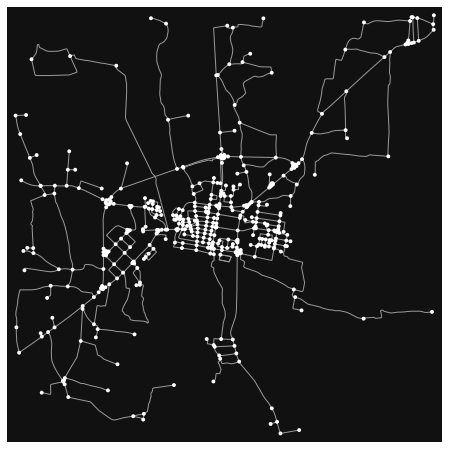

{(44, 369, 0): 0.049183976261127596,
 (46, 385, 0): 0.04859634977644213,
 (47, 364, 0): 0.03766617429837518,
 (63, 73, 0): 0.06153132250580046,
 (74, 169, 0): 0.03866791088300478,
 (79, 91, 0): 0.07307395569271465,
 (83, 94, 0): 0.05743740795287187,
 (88, 94, 0): 0.05743740795287187,
 (123, 371, 0): 0.05083965953531171,
 (127, 162, 0): 0.06510212097407699,
 (128, 427, 0): 0.04352678571428571,
 (138, 151, 0): 0.052862382395152285,
 (136, 142, 0): 0.06102724594992636,
 (140, 150, 0): 0.0708636169303121,
 (140, 155, 0): 0.0708636169303121,
 (194, 203, 0): 0.06149137451307735,
 (201, 203, 0): 0.06149137451307735,
 (205, 206, 0): 0.058393517703012154,
 (208, 216, 0): 0.059191143647888585,
 (224, 231, 0): 0.06951871657754011,
 (240, 241, 0): 0.07347074468085106,
 (215, 244, 0): 0.052870813397129186,
 (248, 255, 0): 0.05556021117908321,
 (249, 250, 0): 0.05658444994452505,
 (252, 253, 0): 0.05621979140167896,
 (258, 261, 0): 0.06412612438340265,
 (144, 259, 0): 0.06173759195455815,
 (160, 262

In [6]:


# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")
fig, ax = ox.plot_graph(G)
edge_centrality

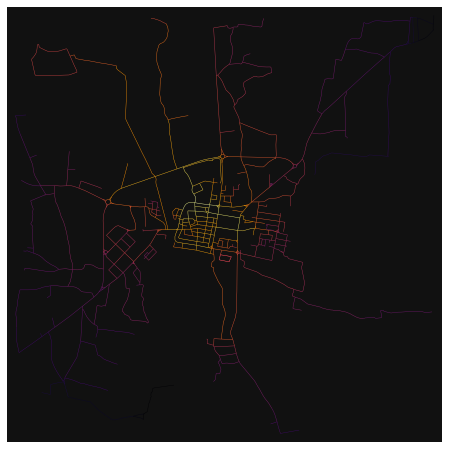

In [7]:


# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=0.4, node_size=0)
#ox.save_fig('aaa.png')


In [8]:


# impute missing edge speeds and calculate edge travel times with the speed module
#G = ox.speed.add_edge_speeds(G)
#G = ox.speed.add_edge_travel_times(G)

G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [267]:
# get the nearest network nodes to two lat/lng points with the distance module
#orig = ox.distance.nearest_nodes(G, X=45.267820, Y=10.47672)
#dest = ox.distance.nearest_nodes(G, X=45.256781, Y=10.486150 )
#route = ox.shortest_path(G, orig, 373111660, weight="length")
#route2 = ox.shortest_path(G,373111660,373111665, weight="length")
#print(route)
#print(route2)


In [268]:
 #x.utils_graph.get_route_edge_attributes(G, route)

In [270]:
#route3 = [1204250926, 480954631, 6793880476, 3712803548, 3790094177,
          3712803560, 5512192031, 5512192032, 1204087666, 480954621,
          1834732157, 6418926694, 6418926691, 1834732159, 480954618, 1204087911, 
          480954617, 1204087606, 1204088003, 1204087357, 373111660,
    1204088194, 1204087326, 1204087788, 1204087672, 373111665]

# find the shortest path between nodes, minimizing travel time, then plot it

#fig, ax = ox.plot_graph_route(G, route, node_size=10)
#fig2, ax2 = ox.plot_graph_route(G, route3, node_size=10)

#ox.plot_graph_routes(G,[route,route2],node_size=1)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

# Disegnare il percorso sulla mappa

In [9]:
#route = ox.shortest_path(G, orig, 373111660, weight="length")
#route2 = ox.shortest_path(G,373111660,373111665, weight="length")
#fig, ax = ox.plot_graph_routes(G,[route,route2],node_size=2)

In [106]:
import os
import pandas as pd
G = nx.convert_node_labels_to_integers(G)
f1 = open("out.txt","r")
stringa_out = f1.read()
f1.close
stringa_out = stringa_out.replace("\n", os.linesep)
stringa_out = stringa_out.replace("\t", " ")
#print(stringa_out)

In [108]:
st = stringa_out.split("ELABORATION_DATA")
#print(st[1])
st_lista = st[1].split("\n")

travels = []
for i in st_lista:
    if i.count(";") >= 2:
        travels.append(i.strip())
        
#print(travels)

In [109]:
# Ricaviamo il numero di deliverer, il numero di mezz'ore e il numero di ordini
first_line = travels[0].split(";")
# Ricavo solo i viaggio di ogni deliverer per ogni mezz'ora
travels = travels[1:len(travels)]
#travels

In [110]:
dfTravels = pd.DataFrame(columns=['deliverer', 'h', 'dest'])

for i in travels:
    temp = i.split(";")

    if temp[2] != '':
        df2 = pd.DataFrame([[ int(temp[0]), int(temp[1]),  np.array(temp[2:len(temp)])  ]],columns=['deliverer', 'h', 'dest'])
    else:
        df2 = pd.DataFrame([[ int(temp[0]), int(temp[1]), np.array([]) ]],columns=['deliverer', 'h', 'dest'])
    
    dfTravels = pd.concat([dfTravels,df2], ignore_index=True)

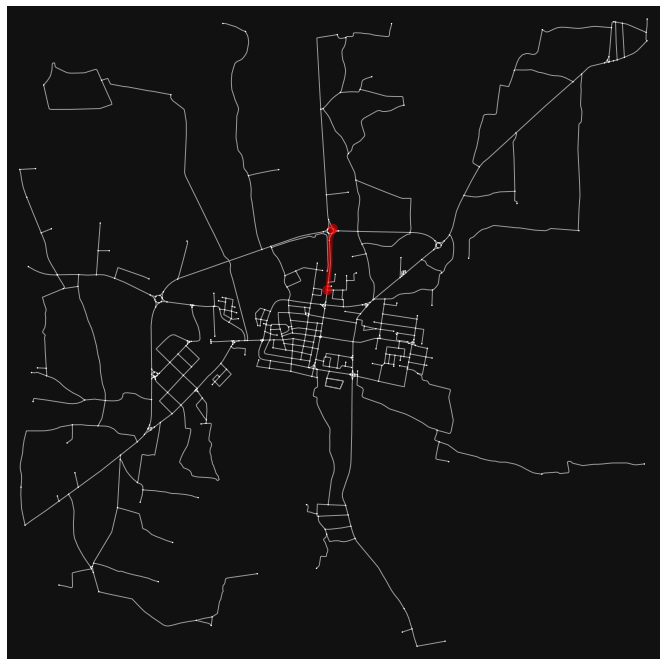

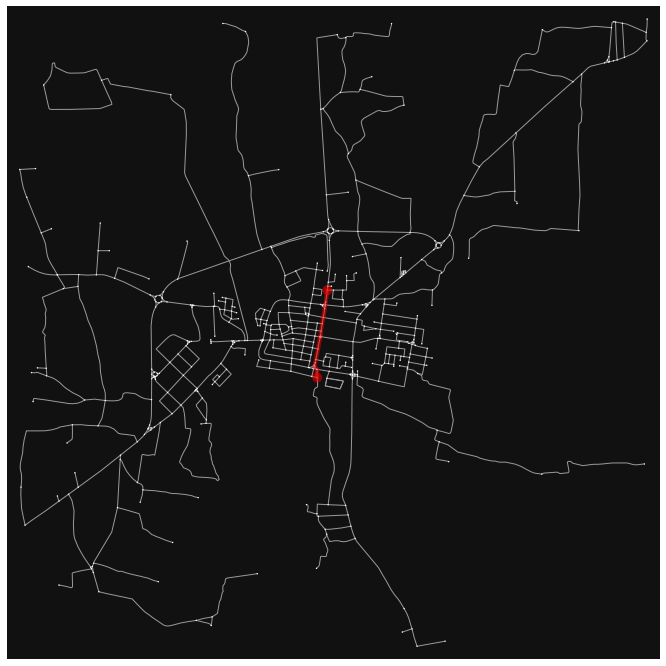

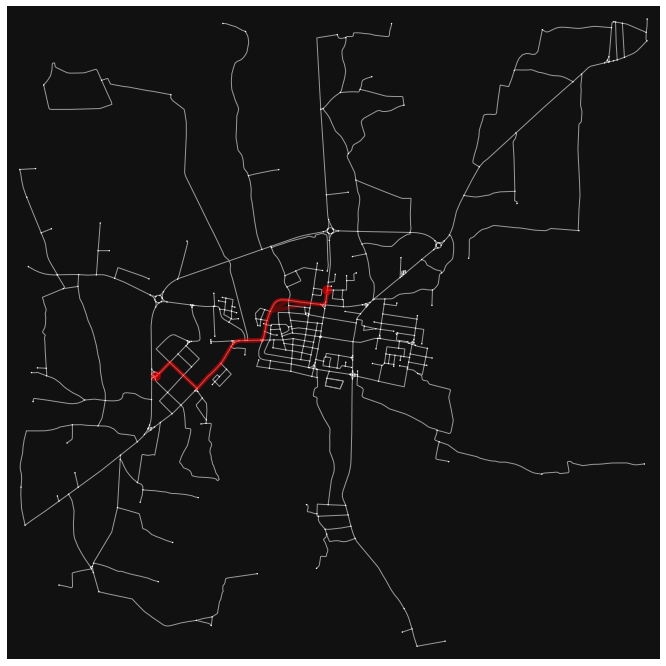

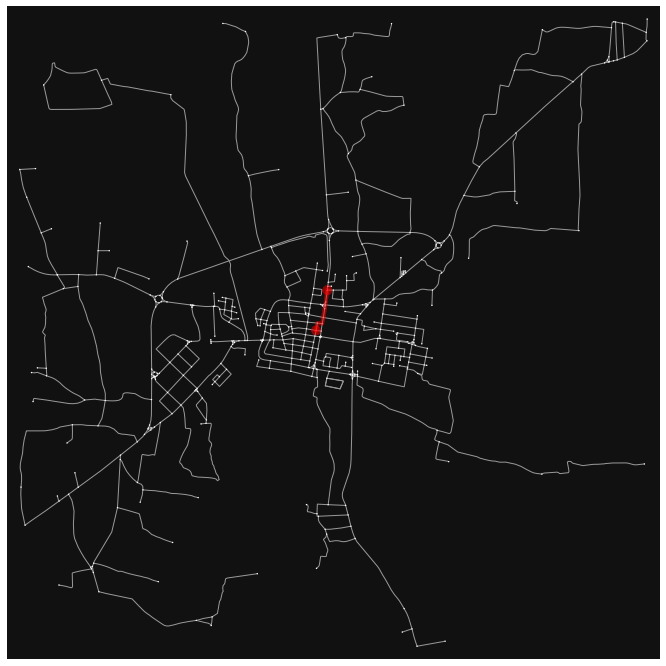

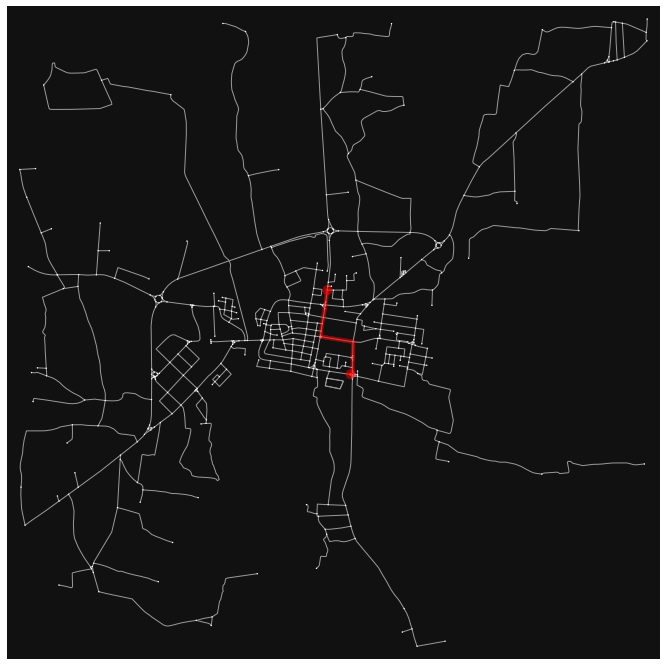

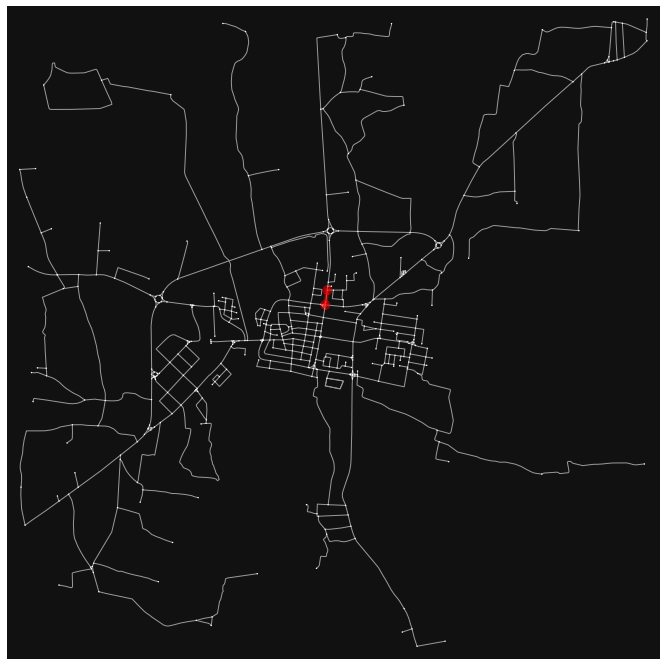

In [111]:
# stampa degli shortest path per ogni mezzo'ora per ogni deliverer
for i in range(len(dfTravels)):
    if len(dfTravels['dest'].iloc[i]) != 0:
        nodes = [1]
        for j in dfTravels['dest'].iloc[i]:
            nodes.append(int(j))
        nodes.append(1)
        
        routes = []
        for j in range(len(nodes) - 1):
            routes.append(ox.shortest_path(G, nodes[j], nodes[j+1], weight="length"))
            
        fig, ax = ox.plot_graph_routes(G,routes, node_size=2,figsize=(12,12), route_alpha=0.3)
    nodes = []
    routes = []